In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv(r"E:\Praxis-BA-18\Term-1\MR\Retail_dataset\Train.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
data.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
data['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
data['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [6]:
data['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
data1=data[['Item_Weight','Item_Outlet_Sales','Item_Visibility','Item_MRP',]]
data1.corr()

,Item_Weight,Item_Outlet_Sales,Item_Visibility,Item_MRP
Item_Weight,1.000000,0.014123,-0.014048,0.027141
Item_Outlet_Sales,0.014123,1.000000,-0.128625,0.567574
Item_Visibility,-0.014048,-0.128625,1.000000,-0.001315
Item_MRP,0.027141,0.567574,-0.001315,1.000000


In [7]:
wt_mean=np.mean(data['Item_Weight'])
wt_mean

12.857645184136183

In [8]:
data['Item_Weight']=data['Item_Weight'].fillna(wt_mean)

In [9]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
data.groupby('Outlet_Size',axis=0).size()

Outlet_Size
High       932
Medium    2793
Small     2388
dtype: int64

In [11]:
data['Outlet_Size']=data['Outlet_Size'].fillna('Medium')

In [12]:
data.groupby('Outlet_Size',axis=0).size()

Outlet_Size
High       932
Medium    5203
Small     2388
dtype: int64

In [13]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Visibility cant be zero


In [14]:
data['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [15]:
##data['Item_Visibility']=data['Item_Visibility'].astype(float)

In [16]:
nonzero_mean = data['Item_Visibility'][ data['Item_Visibility'] != 0 ].mean()
nonzero_mean

0.07048184085069421

In [17]:
##data.loc[data['Item_Visibility']==0,'Item_Visibility']=nonzero_mean

In [18]:
#data['Item_Visibility'].describe()

In [19]:
#data['Item_Visibility']

In [20]:
UniqueItems = set(data.Item_Identifier)
for each in UniqueItems:
    data.loc[(data["Item_Identifier"]==str(each)) & (data["Item_Visibility"]==0),"Item_Visibility"] = data.loc[(data["Item_Identifier"]==str(each)) & (data["Item_Visibility"]!=0),"Item_Visibility"].mean()
data["Item_Visibility"].describe()

count    8523.000000
mean        0.070749
std         0.050313
min         0.003575
25%         0.031395
50%         0.058100
75%         0.098867
max         0.328391
Name: Item_Visibility, dtype: float64

Feature engineering


In [21]:
data["Qty_Sold"] = (data["Item_Outlet_Sales"]/data["Item_MRP"])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Qty_Sold
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14.951963
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9.186454
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14.809346
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,4.021967
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18.467868


Changing the year of establishment to age of outlet

In [22]:
data["Outlet_Age" ] = 2018 - data["Outlet_Establishment_Year"]
data["Outlet_Age"].head()

0    19
1     9
2    19
3    20
4    31
Name: Outlet_Age, dtype: int64

##Introducing 2 new features here1.Outlet_Age 2.Quantity_sold

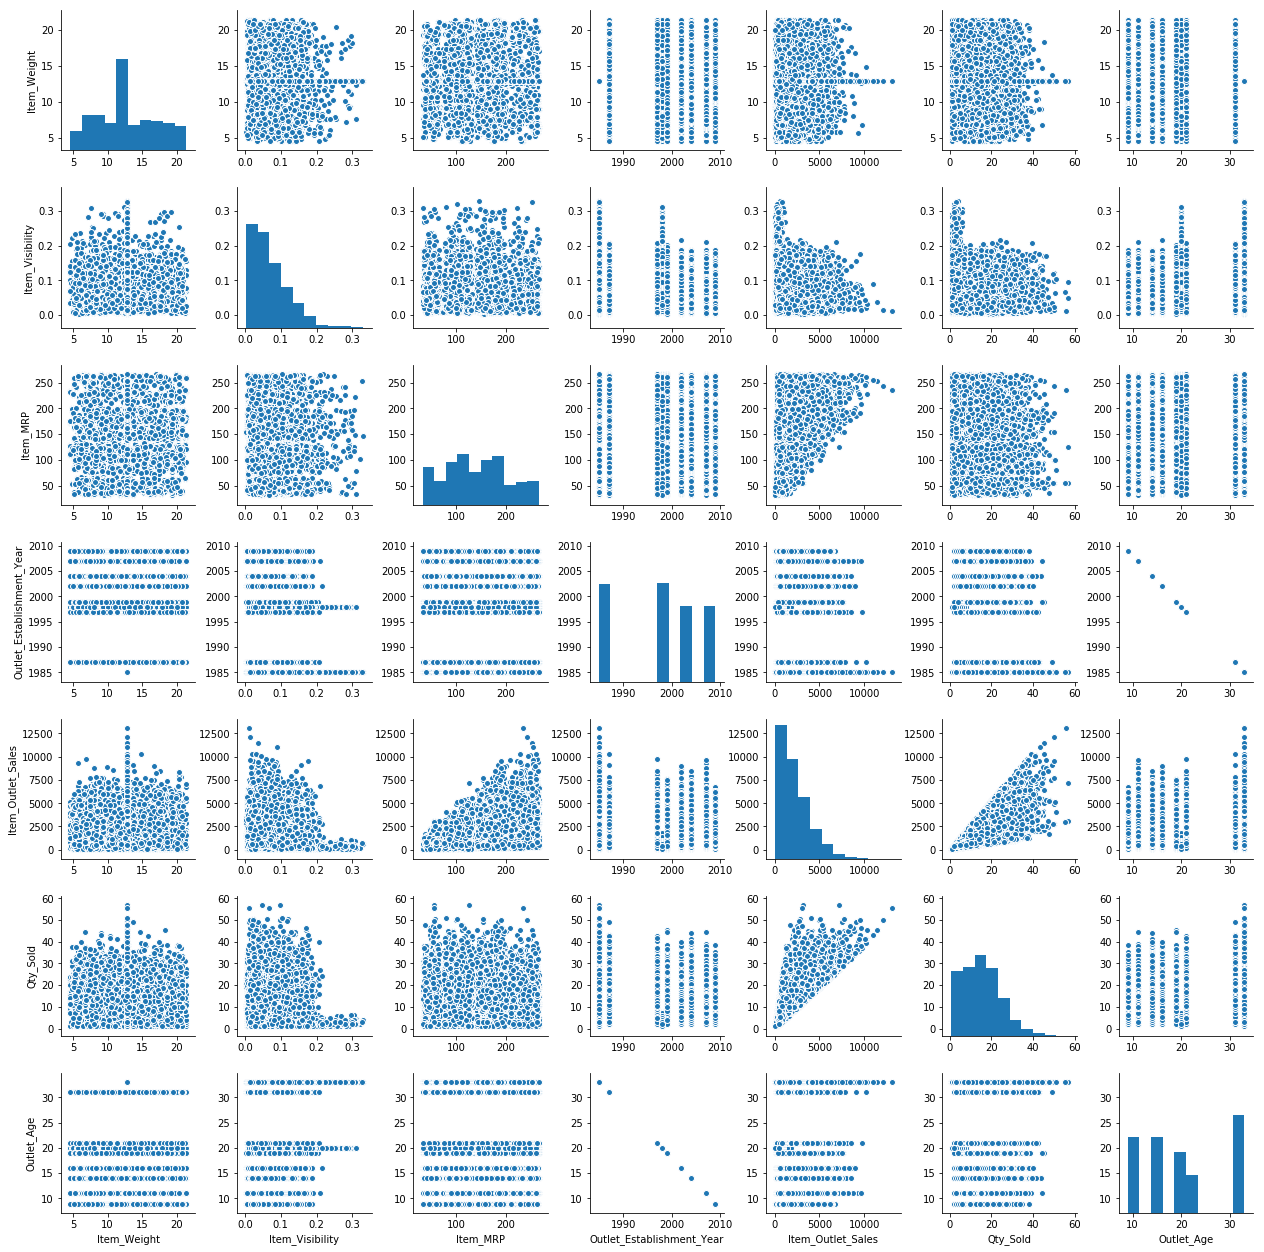

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
g=sns.pairplot(data)
plt.show()

In [24]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Qty_Sold,Outlet_Age
Item_Weight,1.000000,-0.020792,0.024756,-0.008301,0.011550,-0.009103,0.008301
Item_Visibility,-0.020792,1.000000,-0.005951,-0.075238,-0.126026,-0.153242,0.075238
Item_MRP,0.024756,-0.005951,1.000000,0.005020,0.567574,0.011144,-0.005020
Outlet_Establishment_Year,-0.008301,-0.075238,0.005020,1.000000,-0.049135,-0.074536,-1.000000
Item_Outlet_Sales,0.011550,-0.126026,0.567574,-0.049135,1.000000,0.759315,0.049135
Qty_Sold,-0.009103,-0.153242,0.011144,-0.074536,0.759315,1.000000,0.074536
Outlet_Age,0.008301,0.075238,-0.005020,-1.000000,0.049135,0.074536,1.000000


In [25]:
catgorical_col=[x for x in data.dtypes.index if data.dtypes[x]=='object']
catgorical_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [26]:
catgorical_col=[x for x in catgorical_col if x not in ['Item_Identifier','Outlet_Identifier']]

In [27]:
for col in catgorical_col:
    print("Frequency of catagorical variable %s"%col)
    print(data[col].value_counts())

Frequency of catagorical variable Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Frequency of catagorical variable Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Frequency of catagorical variable Outlet_Size
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Frequency of catagorical variable Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Frequency of catagorical variable Outlet_Type
Supermarket Type

In [28]:
##import seaborn as sns
##sns.countplot(x='Item_Fat_Content',data='data')

In [29]:
##fig, ax = plt.subplots(figsize=(10,5))
##bar_size=data.groupby('Outlet_Size').plot(kind='bar')
##plt.show()

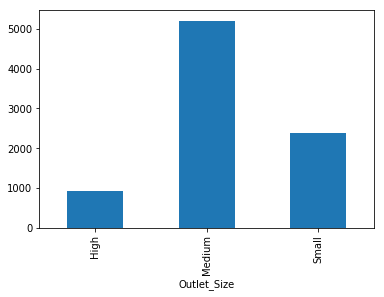

In [30]:
data.groupby('Outlet_Size')['Outlet_Location_Type'].count().plot(kind='bar')

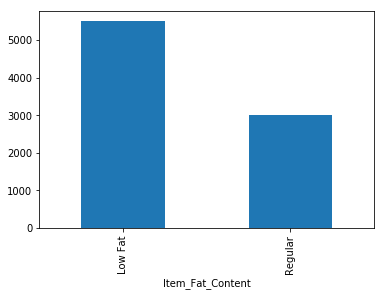

In [35]:
data.groupby('Item_Fat_Content')['Item_Type_Combined'].count().plot(kind='bar')

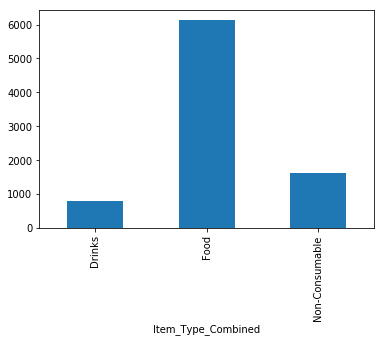

In [36]:
data.groupby('Item_Type_Combined')['Item_Type'].count().plot(kind='bar')

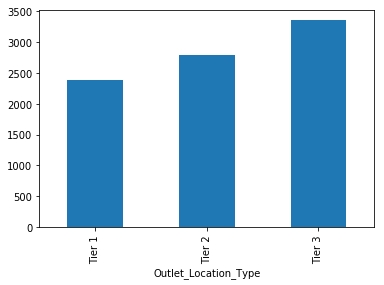

In [37]:
data.groupby('Outlet_Location_Type')['Outlet_Type'].count().plot(kind='bar')

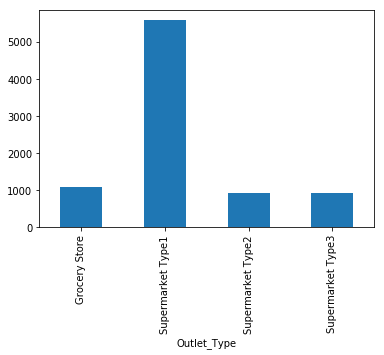

In [38]:
data.groupby('Outlet_Type')['Outlet_Size'].count().plot(kind='bar')

In [39]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#data['Item_Type_Combined']

In [40]:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [41]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Qty_Sold,Outlet_Age,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14.951963,19,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9.186454,9,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14.809346,19,Food
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,4.021967,20,Food
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18.467868,31,Non-Consumable


In [42]:
data=data.drop('Item_Identifier',axis=1)


In [43]:
data=data.drop('Outlet_Establishment_Year',axis=1)

Dummy Variable creation:

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['Item_Fat_Content'])
le.classes_

array(['Low Fat', 'Regular'], dtype=object)

In [45]:
data['Item_Fat_Content']=le.fit_transform(data['Item_Fat_Content'])

In [46]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Qty_Sold,Outlet_Age,Item_Type_Combined
0,9.30,0,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14.951963,19,Food
1,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,9.186454,9,Drinks
2,17.50,0,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14.809346,19,Food
3,19.20,1,0.022911,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,4.021967,20,Food
4,8.93,0,0.016164,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,18.467868,31,Non-Consumable


In [47]:
le.fit(data['Outlet_Size'])
le.classes_

array(['High', 'Medium', 'Small'], dtype=object)

In [48]:
data['Outlet_Size']=le.fit_transform(data['Outlet_Size'])

In [49]:
##data.head()

In [50]:
data_new=pd.get_dummies(data=data,columns=['Item_Fat_Content','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_Combined'])

In [51]:
data_new.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Qty_Sold,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Identifier_OUT010,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.30,0.016047,Dairy,249.8092,3735.1380,14.951963,19,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,Soft Drinks,48.2692,443.4228,9.186454,9,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,Meat,141.6180,2097.2700,14.809346,19,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.022911,Fruits and Vegetables,182.0950,732.3800,4.021967,20,0,1,1,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.016164,Household,53.8614,994.7052,18.467868,31,1,0,0,...,0,0,1,0,1,0,0,0,0,1


In [52]:
new_item_type={'Soft Drinks':'Drinks','Hard Drinks':'Drinks','Dairy':'veg','Fruits and Vegetables':'veg','Starchy Foods':'veg','Breakfast':'veg','Frozen Foods':'Frozen','Canned':'Frozen','Baking Goods':'Snack','Snack Foods':'Snack','Breads':'Snack', 'Household':'HH','Health and Hygiene':'HH','Seafood':'NV','Meat':'NV','Others':'Others'}
new_item_type


{'Baking Goods': 'Snack',
 'Breads': 'Snack',
 'Breakfast': 'veg',
 'Canned': 'Frozen',
 'Dairy': 'veg',
 'Frozen Foods': 'Frozen',
 'Fruits and Vegetables': 'veg',
 'Hard Drinks': 'Drinks',
 'Health and Hygiene': 'HH',
 'Household': 'HH',
 'Meat': 'NV',
 'Others': 'Others',
 'Seafood': 'NV',
 'Snack Foods': 'Snack',
 'Soft Drinks': 'Drinks',
 'Starchy Foods': 'veg'}

In [53]:
print(data_new['Item_Type'].unique())
def change(x):
    return new_item_type[x]
data_new['Item_Type']=data_new['Item_Type'].map(change)
##data_new['Item_Type']

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [54]:
##data_new['Item_Type']=pd.get_dummies(data=data_new,columns=['Item_Type'])
##data_new['Item_Type']
print(data_new['Item_Type'].unique())

['veg' 'Drinks' 'NV' 'HH' 'Snack' 'Frozen' 'Others']


In [55]:
data_new.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Qty_Sold,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Identifier_OUT010,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.30,0.016047,veg,249.8092,3735.1380,14.951963,19,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,Drinks,48.2692,443.4228,9.186454,9,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,NV,141.6180,2097.2700,14.809346,19,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.022911,veg,182.0950,732.3800,4.021967,20,0,1,1,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.016164,HH,53.8614,994.7052,18.467868,31,1,0,0,...,0,0,1,0,1,0,0,0,0,1


In [56]:
##data_new.dtypes

In [57]:
data_new=pd.get_dummies(data=data_new,columns=['Item_Type'])

In [58]:
data_new.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Qty_Sold,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,...,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Item_Type_Drinks,Item_Type_Frozen,Item_Type_HH,Item_Type_NV,Item_Type_Others,Item_Type_Snack,Item_Type_veg
0,9.30,0.016047,249.8092,3735.1380,14.951963,19,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,443.4228,9.186454,9,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,2097.2700,14.809346,19,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,19.20,0.022911,182.0950,732.3800,4.021967,20,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
4,8.93,0.016164,53.8614,994.7052,18.467868,31,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [181]:
data_new=data_new.drop('Item_Outlet_Sales',axis=1)
data_new.shape

ValueError: labels ['Item_Outlet_Sales'] not contained in axis

In [182]:
data_new.shape

(8523, 37)

In [183]:
data_new.describe()

,Item_Weight,Item_Visibility,Item_MRP,Qty_Sold,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,...,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Item_Type_Drinks,Item_Type_Frozen,Item_Type_HH,Item_Type_NV,Item_Type_Others,Item_Type_Snack,Item_Type_veg
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070749,140.992782,15.425685,20.168133,0.647307,0.352693,0.065118,0.109351,0.108647,...,0.093746,0.718644,0.187610,0.077320,0.176581,0.167781,0.057374,0.019829,0.246275,0.254840
std,4.226124,0.050313,62.275067,9.192655,8.371760,0.477836,0.477836,0.246748,0.312098,0.311214,...,0.291493,0.449687,0.390423,0.267114,0.381336,0.373694,0.232570,0.139420,0.430866,0.435797
min,4.555000,0.003575,31.290000,0.952322,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.031395,93.826500,8.949479,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.058100,143.012800,14.926893,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,0.098867,185.643700,21.092696,31.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,21.350000,0.328391,266.888400,56.844890,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [184]:
data_new.shape

(8523, 37)

In [185]:
y=data_new['Qty_Sold']
x=data_new.iloc[:,0:39]
x.shape
x=x.drop('Qty_Sold',axis=1)
print(x.shape)
print(y.shape)

(8523, 36)
(8523,)


In [186]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)


In [187]:
##Linear Regression
from  sklearn  import  linear_model
lr = linear_model.LinearRegression(fit_intercept=True,normalize=True)
lr.fit (x_train,y_train)
print(lr.intercept_)
lr.coef_

3.38722229819e+14


array([ -2.52817401e-02,   1.08572676e+00,   1.87509278e-03,
         3.34878667e+12,  -3.16515536e+13,  -3.16515536e+13,
        -1.67351354e+14,  -7.11665799e+13,  -1.55308936e+14,
        -4.40248766e+13,  -3.39409444e+14,  -9.93874543e+13,
        -1.82489908e+14,  -1.72052869e+14,  -2.87046299e+14,
        -2.63214113e+14,  -1.69035564e+14,  -4.81918413e+13,
        -3.10572290e+13,   1.38803049e+13,  -6.72345791e+13,
        -9.75089464e+13,  -4.26846829e+13,  -5.48623881e+13,
        -1.29174507e+14,  -1.54182809e+14,  -8.09359238e+13,
        -8.09359238e+13,  -2.01529654e+13,   6.26263389e+13,
         6.26263389e+13,   1.84338047e+12,   6.26263389e+13,
         1.84338047e+12,   6.26263389e+13,   6.26263389e+13])

In [188]:
from sklearn import metrics
from sklearn.metrics import r2_score
y_pred=lr.predict(x_test)
metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)

50.353352016579713

In [189]:
r2_score(y_test, y_pred)

0.42826667157509923

In [190]:
##Decission Tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [191]:
y_pred=tree.predict(x_test)

print(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred))
print(r2_score(y_test,y_pred))

50.3220261846
0.428622358366


In [192]:
##AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
adboost = AdaBoostRegressor(n_estimators=100,loss="linear",learning_rate=.005)
adboost.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.005, loss='linear',
         n_estimators=100, random_state=None)

In [193]:
y_pred=adboost.predict(x_test)
print(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred))
print(r2_score(y_test,y_pred))

50.3282891854
0.428551245596


In [210]:
##Lasso linear regression model
Lasso = linear_model.LassoCV(cv=5,normalize=True,random_state=10,alphas=[.0005])
Lasso
Lasso.fit(x_train,y_train)

LassoCV(alphas=[0.0005], copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=10, selection='cyclic', tol=0.0001,
    verbose=False)

In [211]:
y_pred=Lasso.predict(x_test)
print(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred))
print(r2_score(y_test,y_pred))


50.2635205219
0.429286656489


In [196]:
##Applying on Test Data set

In [197]:
data_test=pd.read_csv(r"E:\Praxis-BA-18\Term-1\MR\Retail_dataset\test.csv")
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [198]:
data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [199]:
data_test['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
data_test['Item_Fat_Content'].replace('reg','Regular',inplace=True)
data_test['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)

In [200]:
data_test['Item_Weight']=data_test['Item_Weight'].fillna((data_test['Item_Weight'].mean()))

In [148]:
data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [149]:
data_test['Outlet_Size']=data_test['Outlet_Size'].fillna((data_test['Outlet_Size'].mode()[0]))

In [150]:
data_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [151]:
data_test['Item_Type_Combined'] = data_test['Item_Identifier'].apply(lambda x: x[0:2])
data_test['Item_Type_Combined'] = data_test['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data_test['Item_Type_Combined'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

In [152]:
UniqueItems = set(data_test.Item_Identifier)
for each in UniqueItems:
    data_test.loc[(data_test["Item_Identifier"]==str(each)) & (data_test["Item_Visibility"]==0),"Item_Visibility"] = data_test.loc[(data_test["Item_Identifier"]==str(each)) & (data_test["Item_Visibility"]!=0),"Item_Visibility"].mean()
data_test["Item_Visibility"].describe()

count    5668.000000
mean        0.070096
std         0.050014
min         0.003591
25%         0.031253
50%         0.058049
75%         0.097088
max         0.323637
Name: Item_Visibility, dtype: float64

In [153]:
data_test['Item_Type']=data_test['Item_Type'].map(new_item_type)

In [154]:
##data_test['Item_Type']

In [155]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,FDW58,20.750000,Low Fat,0.007565,Snack,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food
1,FDW14,8.300000,Regular,0.038428,veg,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,Food
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,Non-Consumable
3,FDQ58,7.315000,Low Fat,0.015388,Snack,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,Food
4,FDY38,12.695633,Regular,0.118599,veg,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Food


In [156]:
nonzero_mean = data_test['Item_Visibility'][ data_test['Item_Visibility'] != 0 ].mean()
nonzero_mean

0.07009568838460228

In [157]:
data_test["Outlet_Age" ] = 2018 - data_test["Outlet_Establishment_Year"]
data_test["Outlet_Age"].head()

0    19
1    11
2    20
3    11
4    33
Name: Outlet_Age, dtype: int64

In [158]:
data_test.loc[data_test['Item_Visibility']==0,'Item_Visibility']=nonzero_mean

In [159]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Outlet_Age
0,FDW58,20.750000,Low Fat,0.007565,Snack,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food,19
1,FDW14,8.300000,Regular,0.038428,veg,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,Food,11
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,Non-Consumable,20
3,FDQ58,7.315000,Low Fat,0.015388,Snack,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,Food,11
4,FDY38,12.695633,Regular,0.118599,veg,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Food,33


In [160]:
data__test_new=pd.get_dummies(data=data_test,columns=['Item_Fat_Content','Outlet_Identifier','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_Combined'])

In [161]:
data__test_new.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,FDW58,20.750000,0.007565,107.8622,1999,19,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,FDW14,8.300000,0.038428,87.3198,2007,11,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,NCN55,14.600000,0.099575,241.7538,1998,20,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1
3,FDQ58,7.315000,0.015388,155.0340,2007,11,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,FDY38,12.695633,0.118599,234.2300,1985,33,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [163]:
data__test_new=data__test_new.drop('Item_Identifier',axis=1)


In [164]:
data__test_new.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,20.750000,0.007565,107.8622,1999,19,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,8.300000,0.038428,87.3198,2007,11,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,241.7538,1998,20,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
3,7.315000,0.015388,155.0340,2007,11,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,12.695633,0.118599,234.2300,1985,33,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [165]:
data__test_new=data__test_new.drop('Outlet_Establishment_Year',axis=1)

In [166]:
data__test_new.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,20.750000,0.007565,107.8622,19,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,8.300000,0.038428,87.3198,11,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,241.7538,20,1,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,7.315000,0.015388,155.0340,11,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4,12.695633,0.118599,234.2300,33,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [167]:
data__test_new['Item_Visibility']=data__test_new['Item_Visibility'].fillna(nonzero_mean)

In [173]:
x=data__test_new

In [202]:
data__test_new.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Item_Type_Drinks', 'Item_Type_Frozen', 'Item_Type_HH', 'Item_Type_NV',
       'Item_Type_Others', 'Item_Type_Snack', 'Item_Type_veg',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Combined_Drinks',
       'Item_Type_Combined_Food', 'Item_Type_Combined_Non-Consuma

In [203]:
data_new.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Qty_Sold', 'Outlet_Age',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Type_Combined_Drinks', 'Item_Type_Combined_Food',
       'Item_Type_Combined_Non-Consumable', 'Item_Type_Drinks',
       'Item_Type_Frozen', 'Item_Type_HH', 'Item_Type_NV', 'Item_Type_Others',
       'Item_Type_Snack', 'Item_Type_veg'],
     

In [204]:
##x.isnull().sum()
x.shape

(8523, 36)

In [212]:
lr_predict=lr.predict(x)
lasso_predict=Lasso.predict(x)
tree_predict=tree.predict(x)
adboost_predict=adboost.predict(x)

In [213]:
print(lr_predict[:5])
print(lasso_predict[:5])
print(tree_predict[:5])
print(adboost_predict[:5])

[ 16.625   13.6875  16.6875   1.875   15.8125]
[ 16.63877392  14.08191499  16.78653997   2.46802812  16.00970746]
[ 16.3925214   13.88826709  16.3925214    2.39433382  16.3925214 ]
[ 16.46867749  13.9699183   16.46867749   2.43135222  16.45679014]


In [214]:
data_predict['lr_predict']=pd.Series(lr_predict)*data_predict['Item_MRP']

NameError: name 'data_predict' is not defined

In [217]:
data__test_new['lr_predict']=pd.Series(lr_predict)*data__test_new['Item_MRP']
data__test_new['lasso_predict']=pd.Series(lasso_predict)*data__test_new['Item_MRP']
data__test_new['tree_predict']=pd.Series(tree_predict)*data__test_new['Item_MRP']
data__test_new['adboost_predict']=pd.Series(adboost_predict)*data__test_new['Item_MRP']


In [218]:
data__test_new['Item_Outlet_Sales']=(data__test_new['lr_predict']+data__test_new['lasso_predict']+data__test_new['tree_predict']+data__test_new['adboost_predict'])/5

In [219]:
data_test['Item_Outlet_Sales']=data__test_new['Item_Outlet_Sales']

In [220]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1426.477008
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,971.478188
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,3207.359214
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,284.292486
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,3029.601979


In [227]:
data_pred_sub=data_test.loc[:,['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]

In [228]:
data_pred_sub.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1426.477008
1,FDW14,OUT017,971.478188
2,NCN55,OUT010,3207.359214
3,FDQ58,OUT017,284.292486
4,FDY38,OUT027,3029.601979


In [230]:
data_pred_sub.to_csv(r"E:\Praxis-BA-18\Term-1\MR\Retail_dataset\salespredictioon_submission.csv")